# **IMPORTING LIBRARIES**

In [ ]:
import sys
import os
import argparse

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

#tesnorflow
import tensorflow as tf
from tensorflow import keras
# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model

import keras
from keras import models
from keras.models import Model
from keras.models import Sequential

# Deep Learning - Keras - Layers

from tensorflow.keras.layers  import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D, DepthwiseConv2D


# Deep Learning - Keras - Pretrained Models
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3

# Deep Learning - Keras - Model Parameters and Evaluation Metrics

from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Deep Learning - Keras - Visualisation

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# from keras.wrappers.scikit_learn import KerasClassifier

from keras import backend as K

# Deep Learning - TensorFlow

import tensorflow as tf

# Graph/ Visualization

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image

import cv2
from PIL import Image
from IPython.display import display

# np.random.seed(42)

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)
%matplotlib inline


**LOADING MODEL**

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('C:/DUAEFATIMA/fyp_miss_fauzia/model.h5')
# summarize model.
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 401408)            0         
                                                                 
 dense_6 (Dense)             (None, 8)                 3211272   
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                      

In [ ]:
y_test_1=[]
test_path_1='C:/DUAEFATIMA/work8/Datasets/DR-APTOS/test/test_merge/'

for i in os.listdir(test_path_1):
  #print(i)
  if "X_" in i:
    y_test_1.append(0)
#print(len(y_test_1))
#print(y_test)
for i in os.listdir(test_path_1):
  #print(i)
  if "Y_" in i:
    y_test_1.append(1)
#print(y_test)
# for i in os.listdir(test_path_1):
#   #print(i)
#   if "C" in i:
#     y_test_1.append(2)
# #print(y_test)
# for i in os.listdir(test_path_1):
#   #print(i)
#   if "D" in i:
#     y_test_1.append(3)
# #print(y_test)
# for i in os.listdir(test_path_1):
#   #print(i)
#   if "E" in i:
#     y_test_1.append(4)
#print(y_test_1)
# print(len(y_test_1))
###############################


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
#samreen editt
import time
start = datetime.datetime.now()

y_pred_1=[]
# ds_eye_dir = "C:/DUAEFATIMA/work_2/aptos_split_binary/train"
#Generating a dataset
# ds_eye = tf.keras.preprocessing.image_dataset_from_directory(ds_eye_dir)
test_path_1='C:/DUAEFATIMA/work8/Datasets/DR-APTOS/test/test_merge/'
for i in os.listdir(test_path_1):
    print(i)
    img=image.load_img(test_path_1+'//'+i,target_size=(224,224))
    #img = tf.keras.utils.load_img(image_path, target_size=(224,224))
    img = np.array(img)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    start = datetime.datetime.now()
    label = model.predict(img)
    #print(label)
    if label[0][0]>0.5:
        print(label[0][0])
    #print("class_A")
        y_pred_1.append(1)
    else:
        print(label[0][0])
    #print("class_B")
    
        y_pred_1.append(0)

#print("Predicted score",label)
#    print("Predicted Clas, ls (0 - Cars , 1- Planes): ", label[1][1])
  #p=np.argmax(label)
  #print("Predicted ",p)
  #print([p])
#   y_pred_1.append(p)


end = datetime.datetime.now()
elapsed= end-start
#print ("Time: ",elapsed)
#print(len(y_pred_1))
#print(y_pred_1)



X_Aptos_19_0_002c21358ce6.jpg
1/1 [==============================] - 3s 3s/step
0.0003148486
X_Aptos_19_0_005b95c28852.jpg
1/1 [==============================] - 0s 36ms/step
0.00036669898
X_Aptos_19_0_0097f532ac9f.jpg
1/1 [==============================] - 0s 39ms/step
0.071502365
X_Aptos_19_0_00cc2b75cddd.jpg
1/1 [==============================] - 0s 36ms/step
0.0029346826
X_Aptos_19_0_00f6c1be5a33.jpg
1/1 [==============================] - 0s 39ms/step
0.0015103646
X_Aptos_19_0_0125fbd2e791.jpg
1/1 [==============================] - 0s 40ms/step
0.0119112
X_Aptos_19_0_014508ccb9cb.jpg
1/1 [==============================] - 0s 38ms/step
0.0014225359
X_Aptos_19_0_0151781fe50b.jpg
1/1 [==============================] - 0s 37ms/step
1.0448851e-08
X_Aptos_19_0_0182152c50de.jpg
1/1 [==============================] - 0s 35ms/step
0.051895138
X_Aptos_19_0_01d9477b1171.jpg
1/1 [==============================] - 0s 38ms/step
8.9983126e-07
X_Aptos_19_0_01f7bb8be950.jpg
1/1 [===================

In [ ]:
#print(y_pred_1)

In [ ]:
# img=image.load_img('C:/DUAEFATIMA/DR-APTOS/train/aptos_rdr_nrdr/referable_aptos_split/merge_rdr_nrdr/',target_size=(224,224))
#     #img = tf.keras.utils.load_img(image_path, target_size=(224,224))
# img = np.array(img)
# img = img / 255.0
# img = img.reshape(1,224,224,3)
# label = model.predict(img)
# print(label)

# **VALIDATION METRICS**

 ***BUILDING CONFUSION MATRIX***

600
600


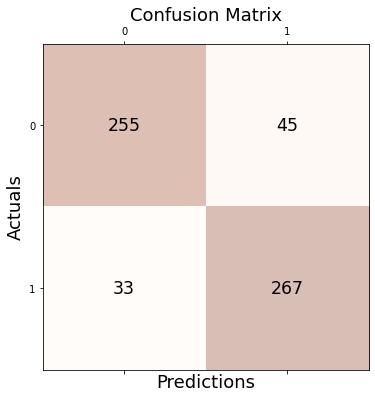

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# Calculate the confusion matrix_1
# print(y_test_1)
# print(y_pred_1)
print(len(y_test_1))
print(len(y_pred_1))
conf_matrix = confusion_matrix(y_test_1,y_pred_1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# print('Precision: %.3f' % precision_score(y_test_1, y_pred_1,average='micro'))
# print('Recall: %.3f' % recall_score(y_test_1, y_pred_1,average='micro'))
# print('Accuracy: %.3f' % accuracy_score(y_test_1, y_pred_1))
# print('F1 Score: %.3f' % f1_score(y_test_1, y_pred_1,average='micro'))

600
600


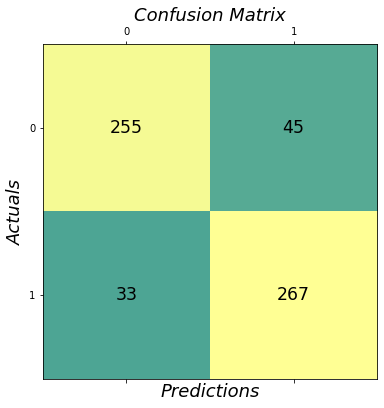

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 

# Calculate the confusion matrix_1
# print(y_test_1)
# print(y_pred_1)
print(len(y_test_1))
print(len(y_pred_1))
conf_matrix = confusion_matrix(y_test_1,y_pred_1)

#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 8))
ax.matshow(conf_matrix, cmap=plt.cm.summer, alpha=0.7)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18,fontstyle="italic")
plt.ylabel('Actuals', fontsize=18,fontstyle="italic")
plt.title('Confusion Matrix', fontsize=18,fontstyle="italic")
plt.show()


***FINDING PRECISION,RECALL,SENSITIVITY,SPECIFICITY AND F1 SCORE***

In [ ]:
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN =conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# f1-score 
F1 = 2 * (PPV * TPR) / (PPV + TPR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Sensitivity",TPR)
print("Specificity",TNR)
print("Precision or Positive Predictive Values",PPV)
print("Negative predictive values",NPV)
print("False Positive or Fall Out",FPR)
print("False Negative Rate",FNR)
print("False discovery Rate",FDR)
print("Accuracy",ACC)
print("f1score",F1)

Sensitivity [0.85 0.89]
Specificity [0.89 0.85]
Precision or Positive Predictive Values [0.88541667 0.85576923]
Negative predictive values [0.85576923 0.88541667]
False Positive or Fall Out [0.11 0.15]
False Negative Rate [0.15 0.11]
False discovery Rate [0.11458333 0.14423077]
Accuracy [0.87 0.87]
f1score [0.86734694 0.87254902]


***ACCURACY OBTAINED IN TEST SET***

In [ ]:
accuracy = accuracy_score(y_test_1, y_pred_1)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 87.0% 


In [ ]:
target= ['level_0', "level_1"]

report = classification_report(y_test_1, y_pred_1, target_names=target)
print(report)

              precision    recall  f1-score   support

     level_0       0.89      0.85      0.87       300
     level_1       0.86      0.89      0.87       300

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



***ROC CURVE***

In [ ]:
F1 = 2 * (PPV * TPR) / (PPV + TPR)

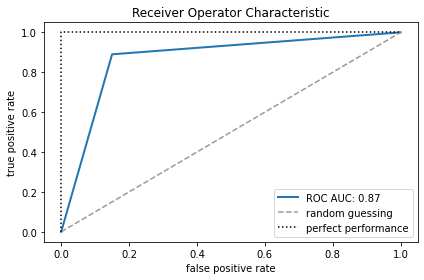

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_1, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'random guessing')
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black', 
         label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()
#plt.savefig('C:/DUAEFATIMA/work_2/messidor_experiments/densnet/messi_densenet_roc_auc.jpg')